<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/Implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df_ins = pd.read_csv("Insurance_Dataset.csv")
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are many statistics that could be discussed for the dataset, below are some examples:

In [ ]:
# Summary and data types
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Statistics about the features and the targets
df_ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


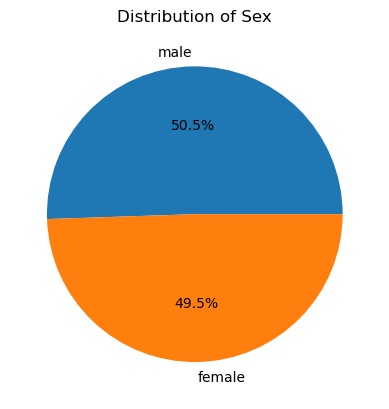

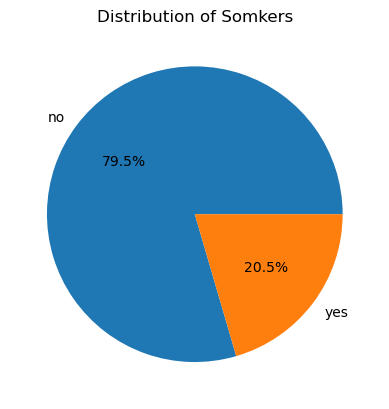

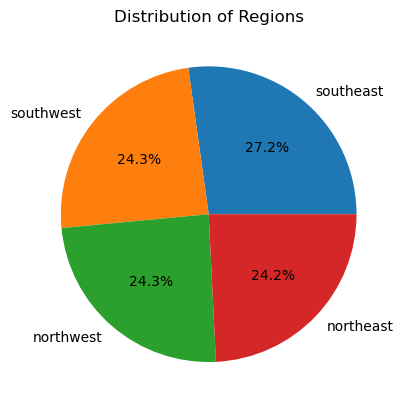

In [ ]:
# Attributes Distributions
sex_count = df_ins['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

smoker_count = df_ins['smoker'].value_counts()
plt.title('Distribution of Somkers')
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.show()

region_count = df_ins['region'].value_counts()
plt.title('Distribution of Regions')
plt.pie(region_count, labels=region_count.index, autopct='%1.1f%%')
plt.show()

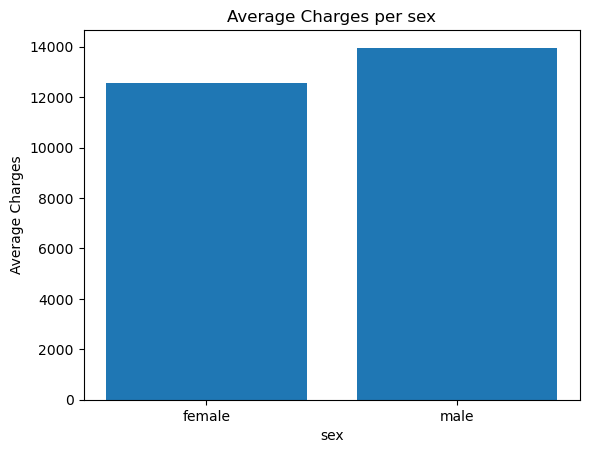

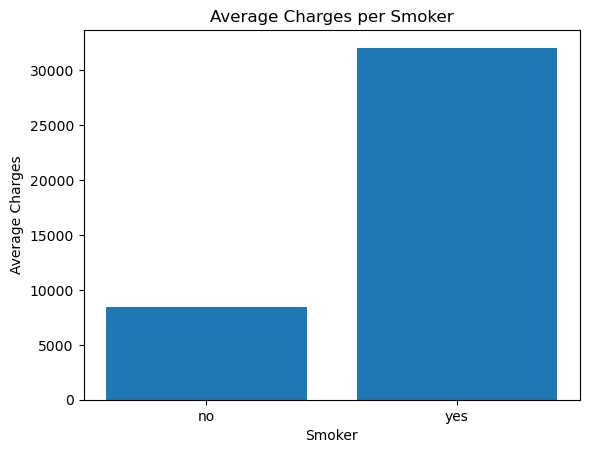

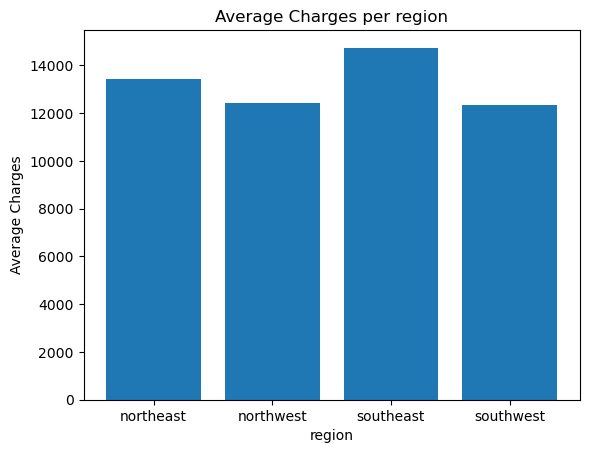

In [ ]:
# Average Charges per attribute
Charges_sex = df_ins.groupby('sex')['charges'].mean()
Charges_smoker = df_ins.groupby('smoker')['charges'].mean()
Charges_region = df_ins.groupby('region')['charges'].mean()

plt.bar(Charges_sex.index, Charges_sex.values)
plt.xlabel('sex')
plt.ylabel('Average Charges')
plt.title("Average Charges per sex")
plt.show()

plt.bar(Charges_smoker.index, Charges_smoker.values)
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.title("Average Charges per Smoker")
plt.show()


plt.bar(Charges_region.index, Charges_region.values)
plt.xlabel('region')
plt.ylabel('Average Charges')
plt.title("Average Charges per region")
plt.show()

In [ ]:
# Encoding data
label_encoder = LabelEncoder()
df_ins['smoker'] = label_encoder.fit_transform(df_ins['smoker'])
df_ins['sex'] = label_encoder.fit_transform(df_ins['sex'])
df_ins['region'] = label_encoder.fit_transform(df_ins['region'])

In [ ]:
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
# Training
X = df_ins.iloc[:, :-1]  # all columns except the last
y = df_ins.iloc[:, -1]  # only the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_predictions = lr_model.predict(X_test)
lr_predictions_tr = lr_model.predict(X_train)

lr_mse_tr = mean_squared_error(y_train, lr_predictions_tr)
lr_mae_tr = mean_absolute_error(y_train, lr_predictions_tr)

lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

print("Training  mean squared error: ", lr_mse_tr)
print("Training absolute squared error: ", lr_mae_tr)

print("Testing  mean squared error: ", lr_mse)
print("Testing absolute squared error: ", lr_mae)

Training  mean squared error:  34671666.50575931
Training absolute squared error:  4019.8996950985165
Testing  mean squared error:  41268342.767653756
Testing absolute squared error:  4419.613544018905


While your MSE seems too large, it is reasonable given the targets in the dataset (the targets are in 10s of thousands). 37M in MSE means that on average, the error is in the range of 6k. This is not ideal, but it is reasonable. The performance is improved with data preprocessing and normalization. The plot below shows how the predictions vary from the actual targets.

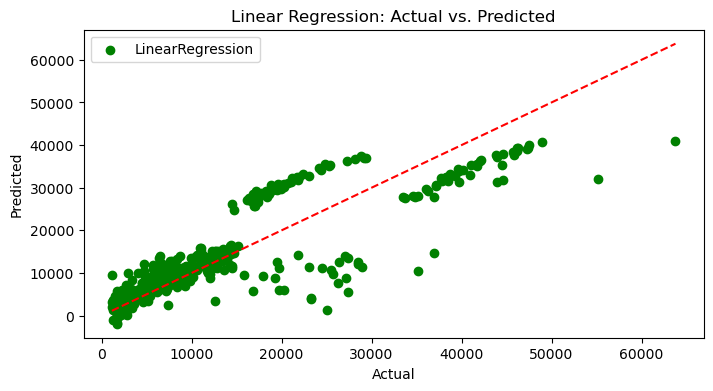

In [ ]:
# Plot actual vs. predicted values for Decision Tree
plt.figure(figsize=(8, 4))
plt.scatter(y_test, lr_predictions, color='green', label='LinearRegression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# Question 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df_can = pd.read_csv("Cancer_Dataset.csv")
df_can

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# Summary and data types
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Statistics about the features and the targets
df_can.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


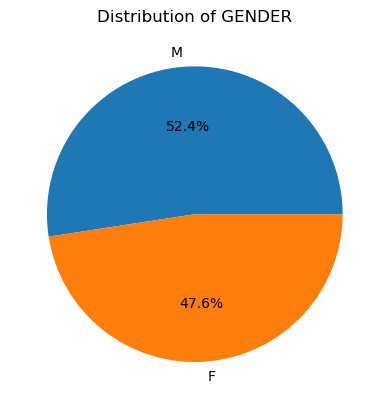

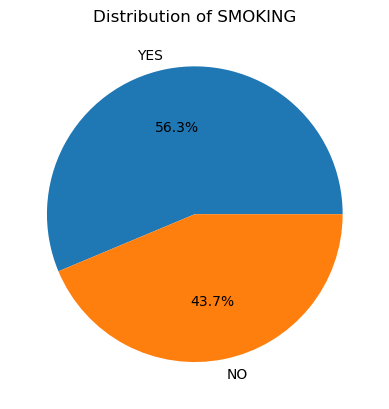

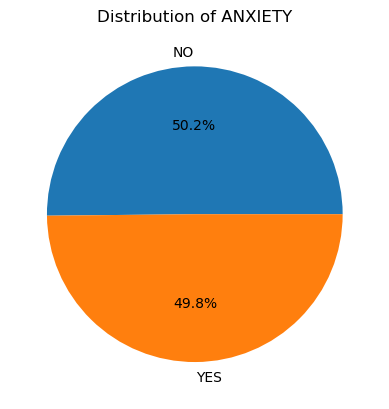

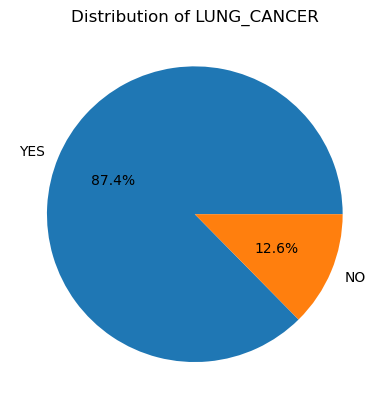

In [ ]:
# Attributes Distributions
gender_count = df_can['GENDER'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Distribution of GENDER')
plt.show()

smoking_labels = df_can['SMOKING'].replace({1: 'NO', 2: 'YES'})
smoker_count = smoking_labels.value_counts()
plt.title('Distribution of SMOKING')
plt.pie(smoker_count, labels=smoker_count.index, autopct='%1.1f%%')
plt.show()

anxiety_labels = df_can['ANXIETY'].replace({1: 'NO', 2: 'YES'})
anxiety_count = anxiety_labels.value_counts()
plt.title('Distribution of ANXIETY')
plt.pie(anxiety_count, labels=anxiety_count.index, autopct='%1.1f%%')
plt.show()

cancer_count = df_can['LUNG_CANCER'].value_counts()
plt.pie(cancer_count, labels=cancer_count.index, autopct='%1.1f%%')
plt.title('Distribution of LUNG_CANCER')
plt.show()

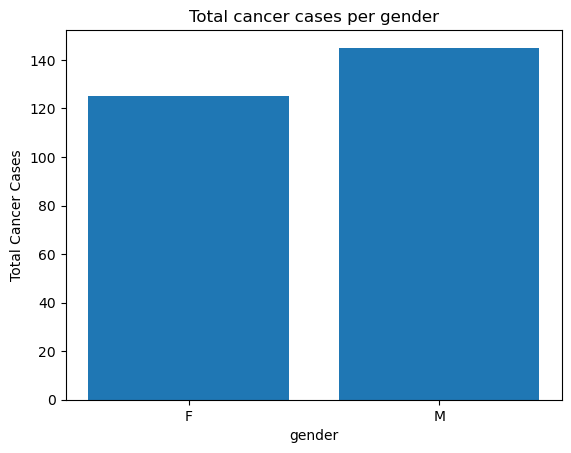

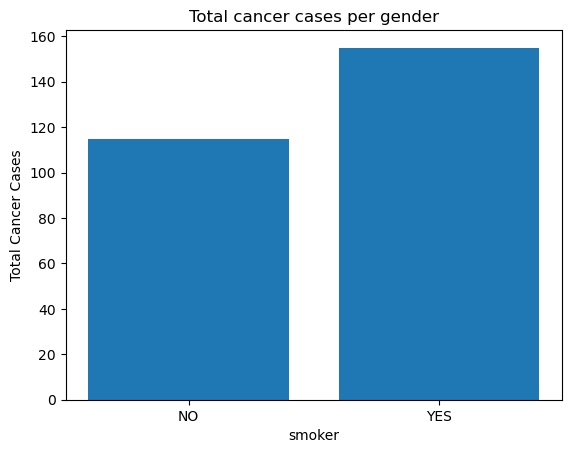

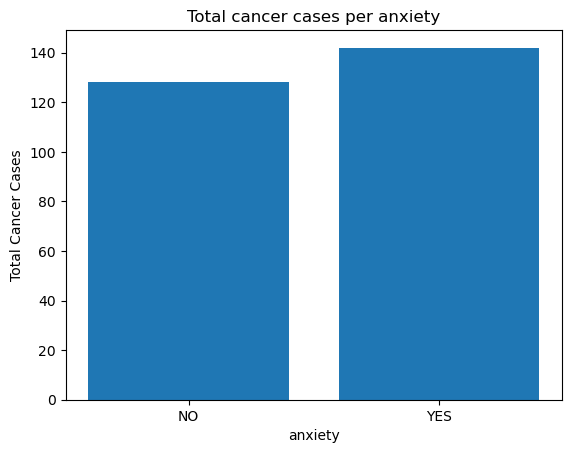

In [ ]:
# Cancer cases per attribute
df_can_t = df_can.copy()
df_can_t['LUNG_CANCER'] = df_can_t['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df_can_t['SMOKING'] = df_can_t['SMOKING'].map({1: 'NO', 2:'YES'})
df_can_t['ANXIETY'] = df_can_t['ANXIETY'].map({1: 'NO', 2:'YES'})

Cancer_gender = df_can_t.groupby('GENDER')['LUNG_CANCER'].sum()
Cancer_smoking = df_can_t.groupby('SMOKING')['LUNG_CANCER'].sum()
Cancer_anxiety = df_can_t.groupby('ANXIETY')['LUNG_CANCER'].sum()

plt.bar(Cancer_gender.index, Cancer_gender.values)
plt.xlabel('gender')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per gender")
plt.show()

plt.bar(Cancer_smoking.index, Cancer_smoking.values)
plt.xlabel('smoker')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per gender")
plt.show()


plt.bar(Cancer_anxiety.index, Cancer_anxiety.values)
plt.xlabel('anxiety')
plt.ylabel('Total Cancer Cases')
plt.title("Total cancer cases per anxiety")
plt.show()

In [ ]:
# Encoding data
label_encoder = LabelEncoder()
df_can['GENDER'] = label_encoder.fit_transform(df_can['GENDER'])
df_can['LUNG_CANCER'] = label_encoder.fit_transform(df_can['LUNG_CANCER'])

In [ ]:
# Training
X1 = df_can.iloc[:, :-1]  # all columns except the last
y1 = df_can.iloc[:, -1]  # only the last column
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

In [ ]:
lr_predictions = lr_model.predict(X_test1)
lr_predictions_tr = lr_model.predict(X_train1)
target_names = ['NO', 'YES']
print("Training Results: \n", classification_report(y_train1, lr_predictions_tr, target_names = target_names))
print("Testing Results : \n", classification_report(y_test1, lr_predictions, target_names = target_names))

Training Results: 
               precision    recall  f1-score   support

          NO       0.82      0.62      0.71        29
         YES       0.94      0.98      0.96       187

    accuracy                           0.93       216
   macro avg       0.88      0.80      0.83       216
weighted avg       0.93      0.93      0.93       216

Testing Results : 
               precision    recall  f1-score   support

          NO       0.50      0.20      0.29        10
         YES       0.91      0.98      0.94        83

    accuracy                           0.89        93
   macro avg       0.71      0.59      0.61        93
weighted avg       0.87      0.89      0.87        93



# Question 3

Insurance Prediction

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


In [ ]:
# Neural Network for the Insurance Regression (many possible solutions)
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Convert from Pandas DataFrame to NumPy arrays
X = X.values
y = y.values.reshape(-1, 1)  # reshaping target to ensure it's a 2D array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Convert arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# creating a dataset object is good when dealing with pytorch
class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


# Create the dataset objects
train_dataset = CustomDataset(features=X_train, targets=y_train)
test_dataset = CustomDataset(features=X_test, targets=y_test)

# Create loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
input_dim = df_ins.shape[1] - 1
model = Net(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for batch_idx, (features, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track and print loss
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Optional: Save model checkpoints, validate the model, etc.

/Users/ahmedalagha/miniconda3/envs/RL/lib/python3.10/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch [10/1000], Loss: 188556016.0000
Epoch [20/1000], Loss: 131718176.0000
Epoch [30/1000], Loss: 95132416.0000
Epoch [40/1000], Loss: 93213504.0000
Epoch [50/1000], Loss: 90232768.0000
Epoch [60/1000], Loss: 33172424.0000
Epoch [70/1000], Loss: 80471968.0000
Epoch [80/1000], Loss: 21397698.0000
Epoch [90/1000], Loss: 61570792.0000
Epoch [100/1000], Loss: 4202853.5000
Epoch [110/1000], Loss: 34365376.0000
Epoch [120/1000], Loss: 80765392.0000
Epoch [130/1000], Loss: 62674096.0000
Epoch [140/1000], Loss: 730723.0000
Epoch [150/1000], Loss: 26799364.0000
Epoch [160/1000], Loss: 5803819.0000
Epoch [170/1000], Loss: 53073116.0000
Epoch [180/1000], Loss: 40252128.0000
Epoch [190/1000], Loss: 27795932.0000
Epoch [200/1000], Loss: 63698504.0000
Epoch [210/1000], Loss: 46478764.0000
Epoch [220/1000], Loss: 3538335.5000
Epoch [230/1000], Loss: 20451838.0000
Epoch [240/1000], Loss: 15889610.0000
Epoch [250/1000], Loss: 13201212.0000
Epoch [260/1000], Loss: 19412698.0000
Epoch [270/1000], Loss: 

In [ ]:
model.eval()
test_loss = 0.0
actuals = []
predictions = []
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.item() * data.size(0)

        # Convert the model output and target from tensors to lists
        actuals.extend(target.view_as(output).cpu().numpy())
        predictions.extend(output.cpu().numpy())

In [ ]:
nn_mse = mean_squared_error(y_test, predictions)

print("Testing  mean squared error: ", lr_mse_tr)

Testing  mean squared error:  34671666.50575931


The performance of the NN is similar to that of the Linear Regression. The performance could be further enhanced with data preprocessing.

Lung Cancer Classification:

In [ ]:
# Neural Network for the Insurance Regression (many possible solutions)
class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 1) # one output representing the probability of class '1', the other class is simply 1 - probability.

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # x = F.relu(self.fc3(x))
        x = self.fc3(x)
        return x

In [ ]:
# Convert from Pandas DataFrame to NumPy arrays
X1 = X1.values
y1 = y1.values.reshape(-1, 1)  # reshaping target to ensure it's a 2D array

# Split the dataset into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [ ]:
# Convert arrays to PyTorch tensors
X_train1 = torch.tensor(X_train1, dtype=torch.float32)
y_train1 = torch.tensor(y_train1, dtype=torch.float32)
X_test1 = torch.tensor(X_test1, dtype=torch.float32)
y_test1 = torch.tensor(y_test1, dtype=torch.float32)

In [ ]:
# creating a dataset object is good when dealing with pytorch
class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


# Create the dataset objects
train_dataset1 = CustomDataset(features=X_train1, targets=y_train1)
test_dataset1 = CustomDataset(features=X_test1, targets=y_test1)

# Create loaders
train_loader1 = DataLoader(dataset=train_dataset1, batch_size=16, shuffle=True)
test_loader1 = DataLoader(dataset=test_dataset1, batch_size=16, shuffle=False)

In [ ]:
input_dim = df_can.shape[1] - 1
model = Net(input_dim)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 1000
model.train()  # Set the model to training mode
predicted_labels_tr = []
true_labels_tr = []
for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch_idx, (features, targets) in enumerate(train_loader1):
        # Forward pass
        outputs = model(features)

        loss = criterion(outputs, targets.float())


        # For binary classification, as in your case, we need to convert output probabilities to binary class (0 or 1)
        predictions = torch.round(torch.sigmoid(outputs.squeeze()))  # Sigmoid to get the probabilities and round to get the class

        true_labels_tr += targets.tolist()
        predicted_labels_tr += predictions.tolist()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Track and print loss
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/1000], Loss: 0.3781
Epoch [20/1000], Loss: 0.1994
Epoch [30/1000], Loss: 0.2589


/Users/ahmedalagha/miniconda3/envs/RL/lib/python3.10/site-packages/torch/optim/optimizer.py:243: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch [40/1000], Loss: 0.4957
Epoch [50/1000], Loss: 0.3940
Epoch [60/1000], Loss: 0.2252
Epoch [70/1000], Loss: 0.1441
Epoch [80/1000], Loss: 0.4021
Epoch [90/1000], Loss: 0.1137
Epoch [100/1000], Loss: 0.0372
Epoch [110/1000], Loss: 0.0598
Epoch [120/1000], Loss: 0.2043
Epoch [130/1000], Loss: 0.1748
Epoch [140/1000], Loss: 0.2270
Epoch [150/1000], Loss: 0.2128
Epoch [160/1000], Loss: 0.0061
Epoch [170/1000], Loss: 0.1693
Epoch [180/1000], Loss: 0.0123
Epoch [190/1000], Loss: 0.6802
Epoch [200/1000], Loss: 0.0747
Epoch [210/1000], Loss: 0.2990
Epoch [220/1000], Loss: 0.9043
Epoch [230/1000], Loss: 0.1197
Epoch [240/1000], Loss: 0.2213
Epoch [250/1000], Loss: 0.2410
Epoch [260/1000], Loss: 0.1409
Epoch [270/1000], Loss: 0.1993
Epoch [280/1000], Loss: 0.0267
Epoch [290/1000], Loss: 0.1830
Epoch [300/1000], Loss: 0.0338
Epoch [310/1000], Loss: 0.0987
Epoch [320/1000], Loss: 0.2767
Epoch [330/1000], Loss: 0.0648
Epoch [340/1000], Loss: 0.0399
Epoch [350/1000], Loss: 0.4299
Epoch [360/100

In [ ]:
model.eval()  # Set the model to evaluation mode
true_labels = []
predicted_labels = []

for batch in test_loader1:
    inputs, labels = batch
    outputs = model(inputs)

    # For binary classification, as in your case, we need to convert output probabilities to binary class (0 or 1)
    predictions = torch.round(torch.sigmoid(outputs.squeeze()))  # Sigmoid to get the probabilities and round to get the class

    true_labels += labels.tolist()
    predicted_labels += predictions.tolist()

# Convert lists to NumPy arrays as sklearn works with NumPy arrays or list not with tensors
true_labels_tr = np.array(true_labels_tr)
predicted_labels_tr = np.array(predicted_labels_tr)

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

print("Training Report: \n",classification_report(true_labels_tr, predicted_labels_tr, target_names=['Class 0', 'Class 1']))

print("Testing Report: \n", classification_report(true_labels, predicted_labels, target_names=['Class 0', 'Class 1']))


Training Report: 
               precision    recall  f1-score   support

     Class 0       0.89      0.77      0.83     31000
     Class 1       0.96      0.98      0.97    185000

    accuracy                           0.95    216000
   macro avg       0.93      0.88      0.90    216000
weighted avg       0.95      0.95      0.95    216000

Testing Report: 
               precision    recall  f1-score   support

     Class 0       0.50      0.75      0.60         8
     Class 1       0.98      0.93      0.95        85

    accuracy                           0.91        93
   macro avg       0.74      0.84      0.78        93
weighted avg       0.93      0.91      0.92        93



The performance is similar to Logistic Regression. It can be seen that the training accuracy is higher, indicating possible overfitting.

# Question 4

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# Data preprocessing and loading

# Define a transform to pre-process the image data
transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard normalization for ImageNet
])

# Load the dataset from the directory
data_dir = 'Dataset'  # replace with the path to your dataset.
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into train and test sets
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create loaders for the training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120) # can you figure out how we got 13 x 13? :D
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
n_epochs = 10

loss_list = []
accuracy_list = []

for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            average_loss = running_loss / 50
            average_accuracy = 100 * correct_predictions / total_predictions

            print(f'[{epoch + 1}, {i + 1:5d}] loss: {average_loss:.6f}, accuracy: {average_accuracy:.2f}%')

            # Store the loss and accuracy
            loss_list.append(average_loss)
            accuracy_list.append(average_accuracy)

            running_loss = 0.0
            correct_predictions = 0
            total_predictions = 0

print('Finished Training')

[1,    50] loss: 1.657049, accuracy: 34.25%
[1,   100] loss: 1.111855, accuracy: 54.69%
[2,    50] loss: 0.610878, accuracy: 92.88%
[2,   100] loss: 0.375437, accuracy: 95.75%
[3,    50] loss: 0.202634, accuracy: 95.88%
[3,   100] loss: 0.123261, accuracy: 97.06%
[4,    50] loss: 0.111769, accuracy: 97.31%
[4,   100] loss: 0.090716, accuracy: 97.12%
[5,    50] loss: 0.109347, accuracy: 96.69%
[5,   100] loss: 0.072451, accuracy: 97.69%
[6,    50] loss: 0.062529, accuracy: 97.88%
[6,   100] loss: 0.037697, accuracy: 98.94%
[7,    50] loss: 0.114913, accuracy: 96.94%
[7,   100] loss: 0.054857, accuracy: 98.19%
[8,    50] loss: 0.040957, accuracy: 98.88%
[8,   100] loss: 0.055006, accuracy: 98.50%
[9,    50] loss: 0.031641, accuracy: 99.00%
[9,   100] loss: 0.024905, accuracy: 99.25%
[10,    50] loss: 0.022056, accuracy: 99.50%
[10,   100] loss: 0.026574, accuracy: 99.06%
Finished Training


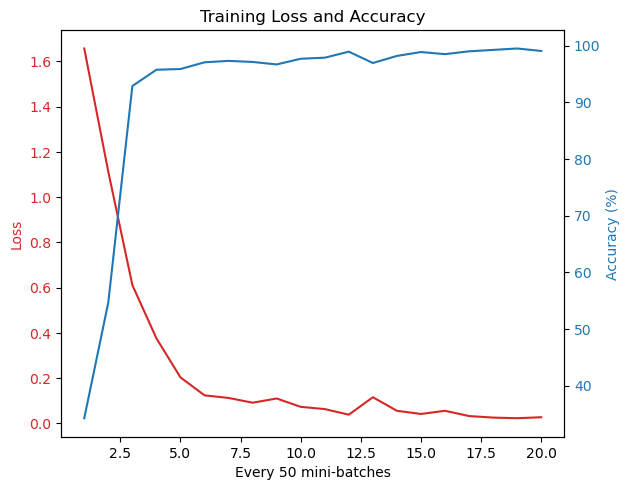

In [ ]:
import matplotlib.pyplot as plt

# Creating the x axis: each point here represents an interval of 50 mini-batches
x_axis = range(1, len(loss_list) + 1)

# Creating subplots: the function subplots() returns a Figure and an Axes object or an array of Axes objects
fig, ax1 = plt.subplots()

# Plotting the loss (left Y-axis)
ax1.set_xlabel('Every 50 mini-batches')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(x_axis, loss_list, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second Y-axis to plot the accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy (%)', color='tab:blue')
ax2.plot(x_axis, accuracy_list, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Adding a title to the plot and showing it
fig.tight_layout()
plt.title('Training Loss and Accuracy')
plt.show()

In [ ]:

# Monitor test loss and accuracy
test_loss = 0.
correct = 0.
total = 0.

predictions = []
true_labels = []

model.eval()  # Set model to evaluate mode
with torch.no_grad():
    for i, data in enumerate(test_loader, 0):
        # Forward pass: compute predicted outputs by passing inputs to the model
        inputs, labels = data
        output = net(inputs)

        # Calculate the loss
        loss = criterion(output, labels)
        test_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader.dataset)
accuracy = 100 * correct / total

print(f'Test Loss: {test_loss:.6f}\n')
print(f'Test Accuracy: {accuracy:.2f}% ({correct}/{total})\n')

Test Loss: 0.001555

Test Accuracy: 98.22% (1768.0/1800.0)



In [ ]:
report = classification_report(true_labels, predictions)

print("Classification Report on Testing Set:")
print(report)

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       303
           1       1.00      1.00      1.00       291
           2       0.97      0.98      0.98       307
           3       1.00      1.00      1.00       292
           4       0.94      0.98      0.96       299
           5       0.99      0.94      0.96       308

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800

